In [9]:
import ga
import numpy as np
import time
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
start_time = time.time()
sol_per_pop = 500
num_parents_mating = 300
# Creating the initial population.
population = ga.createParent(sol_per_pop)
pop_size = population.shape

best_outputs = []
num_generations = 200
mutation_rate = 1

In [10]:
population[0]

array(['H13824914-01/03/0002-31/03/0002-10101001110',
       'H13825208-01/03/0002-31/03/0002-10111001110',
       'H13828018-01/03/0002-31/03/0002-01101001110',
       'H13828030-01/03/0002-31/03/0002-00101001110',
       'H13828331-01/03/0002-31/03/0002-01001001110',
       'H13830315-01/03/0002-31/03/0002-11011001110',
       'H13830317-01/03/0002-31/03/0002-11000001110',
       'H13830319-01/03/0002-31/03/0002-11110001110',
       'H13830321-01/03/0002-31/03/0002-10111001110',
       'H13830323-01/03/0002-31/03/0002-01011001110',
       'H13830325-01/03/0002-31/03/0002-10110001110',
       'H13831025-01/03/0002-31/03/0002-11100001110',
       'H13831382-03/03/0002-31/03/0002-10111001110',
       'H13831386-03/03/0002-31/03/0002-10011001110',
       'H13831388-03/03/0002-31/03/0002-00100001110',
       'H13831390-03/03/0002-31/03/0002-01010001110',
       'H13831392-03/03/0002-31/03/0002-10110001110',
       'H13831394-03/03/0002-31/03/0002-01111001110',
       'H13831396-03/03/0002

In [11]:
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.'

    # ================================================================
    fitness = ga.cal_pop_fitness(population)
    # print(population)
    # break
    # ================================================================
    print("Fitness")
    print(fitness)

    best_outputs.append(np.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", np.max(fitness))

    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(population,
                                    num_parents_mating)
    # print("Parents")
    # print(parents)
    # print('Fitness Parent')
    # print(ga.cal_pop_fitness(parents))
    # Generating next generation using crossover.
    # ==============================HP=============================

    # offspring_crossover = ga.crossover(parents,
    #                                    offspring_size= parents.shape[0])
    offspring_crossover = ga.crossover(parents)
    # print('Fitness Crossover')
    # print(ga.cal_pop_fitness(offspring_crossover))
    # ==============================HP=============================
    # print("Crossover")
    # print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    # ==============================HP=============================

    # offspring_mutation = ga.mutation(offspring_crossover, mutation_rate)
    offspring_mutation = ga.mutation(population, mutation_rate)
    # print('Fitness Mutation')
    # print(ga.cal_pop_fitness(offspring_mutation))
    # ==============================HP=============================
    # print("Mutation")
    # Creating the new population based on the parents and offspring.
    pop_and_child = np.concatenate((offspring_mutation, offspring_crossover, parents,population))

    pop_and_child_fitness = ga.cal_pop_fitness(pop_and_child)
    # get n-largest element from pop_and_child
    n_largest_index = pop_and_child_fitness.argsort()[-pop_size[0]:]
    population = pop_and_child[n_largest_index]

    # ===========================DEBUG=======================
    # test_array = []
    # ele_0 = population[0]
    # for i,ele in enumerate(population):
    #     if i == 0:
    #         continue
    #     flag = False
    #     for task1,task2 in zip(ele_0,ele):
    #         if task1 != task2:
    #             flag = True
    #             break
    #     test_array.append(flag)
    # print(test_array)
    # ===========================DEBUG=======================
    # new_population[0:parents.shape[0], :] = parents
    # new_population[parents.shape[0]:, :] = offspring_mutation
    # break
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.argmax(fitness == np.max(fitness))
best_result = population[best_match_idx, :]
for chromosome_index in range(best_result.shape[0]):
    chromosome = best_result[chromosome_index]
    chromosome = str(chromosome).split('-')
    chromosome[-1] = ga.decode_datetime(chromosome[-1])
    best_result[chromosome_index] = '-'.join(chromosome)
# print("Best solution : ", best_result)
print("Best solution fitness : ", fitness[best_match_idx])
print("--- %s seconds ---" % (time.time() - start_time))

Generation :  0
Fitness
[0.00195695 0.00149031 0.00181488 0.00166389 0.00142653 0.00169205
 0.00199601 0.00188324 0.00172117 0.00195695 0.00199601 0.00184843
 0.00146843 0.00181488 0.00144718 0.00158479 0.00184843 0.00169205
 0.00146843 0.00149031 0.00169205 0.00151286 0.00184843 0.00140647
 0.00195695 0.00212314 0.00178253 0.00199601 0.00191939 0.00181488
 0.0021692  0.00195695 0.00212314 0.00184843 0.00178253 0.00181488
 0.00175131 0.00188324 0.00149031 0.00191939 0.00151286 0.00195695
 0.00175131 0.00172117 0.00181488 0.00172117 0.00203666 0.002079
 0.00195695 0.00212314 0.00212314 0.00156006 0.00195695 0.002079
 0.00181488 0.00195695 0.00158479 0.00184843 0.00195695 0.00184843
 0.00144718 0.00195695 0.00156006 0.00169205 0.00163666 0.00184843
 0.00156006 0.00184843 0.00191939 0.00191939 0.00184843 0.00156006
 0.00178253 0.00181488 0.00195695 0.00151286 0.00188324 0.00156006
 0.00163666 0.00191939 0.00203666 0.00163666 0.002079   0.00144718
 0.00178253 0.0015361  0.00181488 0.001814

Show Result

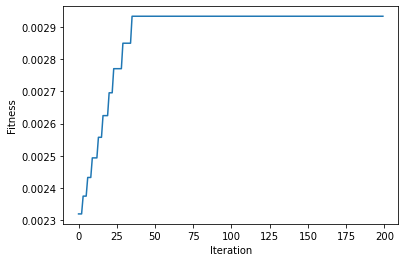

In [14]:
import matplotlib.pyplot

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.savefig('/home/jaylong/PycharmProjects/GA/result.jpg')

In [15]:
matplotlib.pyplot.show()

In [16]:
#Save result to out.csv

df = pd.DataFrame(best_result)
df = df[0].str.split('-', expand=True)
df.columns = ['wonum', 'targstartdate', 'targcompdate', 'schedstartdate']
from pathlib import Path

filepath = Path('out.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)